In [2]:
import time
import string
import regex as re
import pandas as pd
import tweepy
import csv
import nltk

auth = $auth
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search, q='covid').items(10):
    print(tweet.text)

RT @TomDreisbach: BREAKING: 

Following an NPR investigation and calls for a crackdown from @CongressmanRaja, the Federal Trade Commission…
RT @IvanArriola17: Por piedad, dejen de tomar la temperatura en la mano. Paciente con COVID-19 https://t.co/pHyw20phrG
RT @kimngn__: Le covid a trouvé une alternance mdrr
RT @UnseenJapanSite: Politicians in Japan lock out foreigners and encourage people to travel and go to restaurants with discount programs,…
RT @BoobsRadley: Hi, I got a COVID test here on Monday and this is what the line looked like then. It took me less than 20 minutes from arr…
@Toure Funny, because Biden just appointed a CoS who said Covid wasn't a pandemic... after Trump had started restri… https://t.co/LYt3IT5isO
RT @kaitlyn59436: "This is precisely what the pandemic has revealed in astounding clarity—white supremacy."

Ahkok Wong recounts Hongkonger…
"Ouro fecha em alta, com foco em nova onda da covid-19" - https://t.co/ay319i8HD3
RT @SenFeinstein: While this week’s news abo

Will need to use ```tweet_mode = extended``` in order to get full tweets following the limit expansion.

In [12]:
for tweet in tweepy.Cursor(api.search, q='covid').items(10):
    try:
        print(tweet.extended_tweet["full_text"])
    except AttributeError:
        print(tweet.text)


RT @johnmcdonnellMP: This is a moving and incisive account of what Covid can mean even for a young, previously healthy person and exposes t…
İzmir Büyükşehir Belediyesi Başkanvekilimiz Mustafa Özuslu'nun  Covid-19 testinin pozitif çıktığını öğrendik. Geçmi… https://t.co/FTQoohC1Sq
RT @MattCartoonist: 'Only 546 Covid graphs to Christmas'

My latest cartoon for tomorrow's @Telegraph 

Subscribe to my weekly newsletter t…
Mmm... en serio lo que más preocupa es el covid???? 🙄 https://t.co/kVSpzoYnXA
RT @imAnand_96: @arjmxrell We all are waiting to hear "World is covid free"
RT @fantasysixpack: The Fantasy Edge Podcast w/ @RRSSavill @JChan_811 @KevinMHuo

Fantasy Football Week 9
🏈 George Kittle #49ers 
🏈 Kenny G…
@mariarri_ Estoy de acuerdo, miren ustedes que madriza le puso a la jefa de gobierno el covid.
practicamente le des… https://t.co/6YwFn0B9ta
RT @JavierGimenoP: El Gobierno de Nueva Zelanda que es uno de los paises que mejor ha gestionado el Covid se ha bajado el sueldo un 20%. El…


In [18]:
for tweet in tweepy.Cursor(api.search, q='covid', tweet_mode = 'extended').items(10):
    try:
        print(tweet.extended_tweet["full_text"])
    except AttributeError:
        print(tweet.full_text)


Been avoiding talking about covid drama but an email from uni just said Liverpool are going to get regular testing whether you’ve got symptoms or not?😂 what happened to “DoNt WaSTe TEsTs thEY’re limiTED” 🥴 BIGGEST CONTRADICTION
RT @mitchellreports: In NC, @trymainelee: "So many folks have come out early to vote. Those out today said they wanted to be here on Electi…
RT @Christi45657364: @fordnation @celliottability @RodPhillips01 Covid-1984 fraudsters will rot in hell for terrorizing the public over a t…
RT @LaureBotella: En raison du contexte sanitaire #Covid_19, des établissements d'accueil des SDF ont dû réduire leurs capacités, recevant…
RT @EliizabeethJb: RT if you hate this fcking covid

I'm voting for Justin Bieber for Artist of the Year at the #AMAs
RT @BellyUpFantasy: Injuries, bye weeks, and covid-19 have the waiver wire this week in flux. Our own Kevin Wilson @KEVIN62WILSEA is here t…
RT @zoyonce44: my mental health is trash.
school is a hot mess. 
covid is still here. 
and 

But I don't want to deal with retweets, at least not at the moment.

In [19]:
for tweet in tweepy.Cursor(api.search, q='covid -filter:retweets', tweet_mode = 'extended').items(10):
    try:
        print(tweet.extended_tweet["full_text"])
    except AttributeError:
        print(tweet.full_text)

@tomaszbryjow Trzeba dodac, ze kilku lekarzy na swiecie podwaza stosowanie respiratora jako jedyne panaceum na covid. Co prawda parametry wskazuja hipoksje, ale czesto pacjenci nie wygladaja na to. Byc moze lepiej byloby stosowac tylko tlenoterapie, niektorzy wskazuja na komore hiperbaryczna.
Per @MikeGarafolo, 6 Ravens deemed close contacts to CB-Marlon Humphrey (who tested positive for COVID-19 yesterday and won’t play against the Colts).

So they go on the COVID list. Can’t practice this week. Must continue to test negative to play on Sunday.
@LFCXOXO The Covid scam will be ramped up by a 100, get the vaccine or you can't go on holiday etc Basically everyone will have a need passport! Then there's the isolation camps that Canada and Aus are bringing in, if you don't take a test/vaccine you get locked away for public safety xo
@niketrem_ q até lá já tenha saído a vacina do covid
@thebeach345 DuhSantass is probably too busy manipulating the polling data to bother with his typical Covi

Need to limit to English-language tweets in order to create clusters that are topics instead of languages. Best approach I've been able to think of is generating a dict using an English words list; then each word of a tweet can be compared looked up in the dict and if a threshold fraction of the words are found in the dict it can be included in the corpus.

In [21]:

nltk.download('words')
english_words = dict.fromkeys(words.words(), True)
len(english_words)

[nltk_data] Downloading package words to /Users/chesh1/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


235892

In [5]:
# Code snippet from tweepy docs; deals with rate limits by sleeping
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            time.sleep(15 * 60)


```API.search(q[, geocode][, lang][, locale][, result_type][, count][, until][, since_id][, max_id][, include_entities])```
using 'en' for language will limit to mostly English tweets (best effort, no results guaranteed, etc.) which will, with luck, mean that I'm not having to throw out too many tweets after I pull down things initially.

Attempting to have this get written to a .csv; using code adapted from https://stackoverflow.com/a/21869560/2880512

In [25]:


with open('covid_tweets.csv', 'a') as csv_file:
    csv_writer = csv.writer(csv_file)
    for tweet in limit_handled(tweepy.Cursor(api.search, 
                                            q = 'covid -filter:retweets', 
                                            lang = 'en', 
                                            tweet_mode = 'extended').items(100)):
        try:
            tweet_text = tweet.extended_tweet['full_text']
        except AttributeError:
            tweet_text = tweet.full_text
        csv_writer.writerow([tweet_text, tweet.user.screen_name, tweet.created_at])

RuntimeError: generator raised StopIteration

In [32]:
for tweet in limit_handled(tweepy.Cursor(api.search, q = 'covid -filter:retweets', lang = 'en', tweet_mode = 'extended').items(10)):
    print(tweet.full_text)
    print(tweet.user.screen_name)
    print(tweet.created_at)

@NBCPhiladelphia Vote BLUE.  There is COVID spread from TRUMP RALLEY
kmoon103
2020-11-03 23:23:40
@sandra_hultgren @JocelynBenson @sandra_hultgren
Hmm. Sounds like a bot.
Registered just a week ago. Trump supporter whose ballot never showed up, and is 1800 miles away from voting precinct, and also believes Covid-19 is a hoax.
CarmenMonteto
2020-11-03 23:23:39
@realDonaldTrump Polls haven't closed and ppl still dying of covid.  What looks good to you right now???
BryanElam
2020-11-03 23:23:39
Wisconsin sets another daily record with 5,771 COVID-19 cases and 52 more deaths. https://t.co/EtJVcr84CM
StarTribune
2020-11-03 23:23:38
Just a friendly reminder that there are people who think COVID ends tonight. There are people not wearing masks. Please be extra cautious.
tadeckcox
2020-11-03 23:23:37
@yungchros @Eridian_Games @PERRRCCWRRLDD @JrushBruhGaming @oingomyboingos Incited violence? Is he saying that they need to be rioting in the streets and terrorizing anyone, no matter who it is?

I

RuntimeError: generator raised StopIteration

After a lot of attempting to troubleshoot the code and find out where the StopIteration error was coming from, I actually looked at the covid_tweets.csv - they're all there. A little internet research later, it turns out this is a consequences of Python 3.7+. Generators used to silently die when a StopIteration error was raised (such as when a generator hit a limit). Now, it's converted to a runtime error unless the code is updated with a try except loop (i.e. inside tweepy itself).
```PEP 479 is enabled for all code in Python 3.7, meaning that StopIteration exceptions raised directly or indirectly in coroutines and generators are transformed into RuntimeError exceptions. (Contributed by Yury Selivanov in bpo-32670.)```

Meaning that I can just accept this as a consequence of the generator hitting the end of its lifespan as specified in ```.items()``` and not worry about it. On the upside, I guess, I got a bit more practice decoding json dictionaries and actually understand what's available from a tweet at least a little bit better (and holy cow is there a lot of information that gets brought back!).

In [61]:
test_tweet = api.get_status(1323785466743840773)
test_tweet.entities['urls'][0]['url']

IndexError: list index out of range

In [65]:
with open('covid_tweets.csv', 'a') as csv_file:
    csv_writer = csv.writer(csv_file)
    for tweet in limit_handled(tweepy.Cursor(api.search, 
                                            q = 'covid -filter:retweets', 
                                            lang = 'en', 
                                            tweet_mode = 'extended', 
                                            wait_on_rate_limit = True).items(100000)):
        try:
            tweet_text = tweet.extended_tweet['full_text']
        except AttributeError:
            tweet_text = tweet.full_text
        tweet_symbols = tweet.entities['symbols']
        try:
            tweet_disp_url = tweet.entities['urls'][0]['url']
        except IndexError:
            tweet_disp_url = ''
        csv_writer.writerow([tweet_text, tweet.user.screen_name, tweet.id, 
                             tweet_symbols, tweet_disp_url, tweet.created_at])

TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)

Laptop got shut; only have a little over 10k tweets at the moment, which is barely enough. Last tweet fetched was 1323849869283373058

In [66]:
with open('covid_tweets.csv', 'a') as csv_file:
    csv_writer = csv.writer(csv_file)
    for tweet in limit_handled(tweepy.Cursor(api.search, 
                                            q = 'covid -filter:retweets', 
                                            lang = 'en', 
                                             max_id = 1323849869283373058,
                                            tweet_mode = 'extended', 
                                            wait_on_rate_limit = True).items(100000)):
        try:
            tweet_text = tweet.extended_tweet['full_text']
        except AttributeError:
            tweet_text = tweet.full_text
        tweet_symbols = tweet.entities['symbols']
        try:
            tweet_disp_url = tweet.entities['urls'][0]['url']
        except IndexError:
            tweet_disp_url = ''
        csv_writer.writerow([tweet_text, tweet.user.screen_name, tweet.id, 
                             tweet_symbols, tweet_disp_url, tweet.created_at])

RuntimeError: generator raised StopIteration

In [84]:
tweets = pd.read_csv('covid_tweets.csv', header = None)
tweets.head()

,0,1,2,3,4,5
0,"Iowa averaged a pandemic high 2,266 new Covid ...",randomanne,1323862079766437888,[],NaN,2020-11-04 05:38:10
1,@TheAngel_Plays @SweetPxtatoe @kiararoyale @Me...,Alex_isnotsorry,1323862068458639361,[],NaN,2020-11-04 05:38:07
2,@baxterberrie 4x this many americans died from...,magpievw,1323862066579402752,[],NaN,2020-11-04 05:38:07
3,@tonim57601 @MarlenaStell Covid-19...I’d hate ...,twinkie531,1323862062372737025,[],NaN,2020-11-04 05:38:06
4,Is it covid effect? Or something else is going...,0ptimiste,1323862058845278208,[],https://t.co/KHyVcO0I6R,2020-11-04 05:38:05


In [69]:

tweets.rename(columns = {0: 'tweet', 1: 'user', 2: 'id', 3: 'symbols', 4: 'link', 5: 'when'})

,tweet,user,id,symbols,link,when
0,"Iowa averaged a pandemic high 2,266 new Covid ...",randomanne,1323862079766437888,[],NaN,2020-11-04 05:38:10
1,@TheAngel_Plays @SweetPxtatoe @kiararoyale @Me...,Alex_isnotsorry,1323862068458639361,[],NaN,2020-11-04 05:38:07
2,@baxterberrie 4x this many americans died from...,magpievw,1323862066579402752,[],NaN,2020-11-04 05:38:07
3,@tonim57601 @MarlenaStell Covid-19...I’d hate ...,twinkie531,1323862062372737025,[],NaN,2020-11-04 05:38:06
4,Is it covid effect? Or something else is going...,0ptimiste,1323862058845278208,[],https://t.co/KHyVcO0I6R,2020-11-04 05:38:05
...,...,...,...,...,...,...
106674,@sibyllete Lol. You can have a ballot mailed t...,_slayyourway,1323715235832803333,[],NaN,2020-11-03 19:54:40
106675,https://t.co/dw8TOPdbmS idea of a nonprofit ta...,DeuterTokomak,1323715234910142467,[],https://t.co/dw8TOPdbmS,2020-11-03 19:54:40
106676,@realDonaldTrump Regardless of the outcome of ...,RockStreetTV,1323715234322927617,[],https://t.co/zg84AT5krT,2020-11-03 19:54:39
106677,@Walmart I love the way you have face covering...,HalfwitTurtle,1323715233861509122,[],NaN,2020-11-03 19:54:39


In [85]:
# Strip out anything from http to the next whitespace character
tweets[0] = tweets[0].replace(r'http\S+', '', regex = True)

In [86]:
# Strip out all punctuation except _ and '
tweets[0] = tweets[0].replace(r'[-.!@#$%^&*()+=;:",<>?|]', '', regex = True)

In [87]:
# Strip out apostrophes that aren't inside characters
tweets[0] = tweets[0].replace(r"(?![A-z])'(?<![A-z])", '', regex = True)

In [88]:
# Stripping out digits while I'm at it - losing some information, because I wouldn't be surprised if COVID-19 and covid and COVID_19 have different meaning, but don't want to do a bunch of hand coding
tweets[0] = tweets[0].replace(r'\d', '', regex = True)
tweets

,0,1,2,3,4,5
0,Iowa averaged a pandemic high new Covid infec...,randomanne,1323862079766437888,[],NaN,2020-11-04 05:38:10
1,TheAngel_Plays SweetPxtatoe kiararoyale MeganP...,Alex_isnotsorry,1323862068458639361,[],NaN,2020-11-04 05:38:07
2,baxterberrie x this many americans died from c...,magpievw,1323862066579402752,[],NaN,2020-11-04 05:38:07
3,tonim MarlenaStell CovidI’d hate to think of t...,twinkie531,1323862062372737025,[],NaN,2020-11-04 05:38:06
4,Is it covid effect Or something else is going on,0ptimiste,1323862058845278208,[],https://t.co/KHyVcO0I6R,2020-11-04 05:38:05
...,...,...,...,...,...,...
106674,sibyllete Lol You can have a ballot mailed to ...,_slayyourway,1323715235832803333,[],NaN,2020-11-03 19:54:40
106675,idea of a nonprofit taking a lead role in set...,DeuterTokomak,1323715234910142467,[],https://t.co/dw8TOPdbmS,2020-11-03 19:54:40
106676,realDonaldTrump Regardless of the outcome of t...,RockStreetTV,1323715234322927617,[],https://t.co/zg84AT5krT,2020-11-03 19:54:39
106677,Walmart I love the way you have face coverings...,HalfwitTurtle,1323715233861509122,[],NaN,2020-11-03 19:54:39


This worked, but I'd like to try out a [much faster solution](https://stackoverflow.com/questions/50444346/fast-punctuation-removal-with-pandas) that I previously came across using the translate function; for only around 100k documents averaging under 200 characters each, it's not really necessary, but for larger problems, it might actually make a difference in computational time required.

In [83]:

remove_chars = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~0123456789'
removal_table = str.maketrans(dict.fromkeys(remove_chars, ''))

tweets2 = pd.read_csv('covid_tweets.csv', header = None)
tweets2[0] = '|'.join(tweets2[0].tolist()).translate(removal_table).split('|')

tweets2

Ran into a problem where length of series is different - there are some tweets that are literally only characters. Weird problem, but if I ran into it in the future, it would make sense to work around it by having the values for the removal_table be ' ' instead of ''; if need be I could run another pass to condense whitespace.

I'm not stripping out usernames or hastags yet, because I think some of those will be meaningful (like CDC, realDonaldTrump, Plandemic, etc.). However, I'm going to threshold things so that words appearing in <1% of the documents or >60% of the documents are dropped.

Cleaning process:
1. Remove URLs from http through next whitespace
2. Replace punctuation except for apostrophe with ' ' to avoid slamming together words where people missed spaces (on accident or to make more characters available)
3. Replace apostrophe with empty string, which will compress contractions
4. Remove numbers that are surrounded by whitespace

Will need to run stopwords set through replacing apostrophe with empty string before stripping out stopwords.

In [97]:
tweets = pd.read_csv('covid_tweets.csv', header = None)
# Strip out anything from http to the next whitespace character
tweets[0] = tweets[0].replace(r'http\S+', '', regex = True)
# Replace all punctuation except _, - and ' with spaces
tweets[0] = tweets[0].replace(r'[.!@#$%^&*()+=;:",<>?|]+', ' ', regex = True)
# Strip out apostrophes
tweets[0] = tweets[0].replace("[’'`]+", '', regex = True)
# Strip out digits not attached to alpha characters
tweets[0] = tweets[0].replace(r'(?<=\s)\d+(?=\s)', '', regex = True)
# Replace multiple spaces with single spaces
tweets[0] = tweets[0].replace(r'\s+', ' ', regex = True)
tweets

,0,1,2,3,4,5
0,Iowa averaged a pandemic high new Covid infect...,randomanne,1323862079766437888,[],NaN,2020-11-04 05:38:10
1,TheAngel_Plays SweetPxtatoe kiararoyale Megan...,Alex_isnotsorry,1323862068458639361,[],NaN,2020-11-04 05:38:07
2,baxterberrie 4x this many americans died from...,magpievw,1323862066579402752,[],NaN,2020-11-04 05:38:07
3,tonim57601 MarlenaStell Covid-19 Id hate to t...,twinkie531,1323862062372737025,[],NaN,2020-11-04 05:38:06
4,Is it covid effect Or something else is going on,0ptimiste,1323862058845278208,[],https://t.co/KHyVcO0I6R,2020-11-04 05:38:05
...,...,...,...,...,...,...
106674,sibyllete Lol You can have a ballot mailed to...,_slayyourway,1323715235832803333,[],NaN,2020-11-03 19:54:40
106675,idea of a nonprofit taking a lead role in set...,DeuterTokomak,1323715234910142467,[],https://t.co/dw8TOPdbmS,2020-11-03 19:54:40
106676,realDonaldTrump Regardless of the outcome of ...,RockStreetTV,1323715234322927617,[],https://t.co/zg84AT5krT,2020-11-03 19:54:39
106677,Walmart I love the way you have face covering...,HalfwitTurtle,1323715233861509122,[],NaN,2020-11-03 19:54:39


In [98]:
tweets.to_csv('cleaned_covid_tweets.csv')

# Grabbing more tweets in an attempt to get around heavy time-dependence of context
Tweetrange of original dataset: 1323715233291161613-1323862079766437888

In [6]:
with open('covid_tweets.csv', 'a') as csv_file:
    csv_writer = csv.writer(csv_file)
    for tweet in limit_handled(tweepy.Cursor(api.search, 
                                            q = 'covid -filter:retweets', 
                                            lang = 'en', 
                                             min_id = 1323862079766437888,
                                            tweet_mode = 'extended', 
                                            wait_on_rate_limit = True).items(100000)):
        try:
            tweet_text = tweet.extended_tweet['full_text']
        except AttributeError:
            tweet_text = tweet.full_text
        tweet_symbols = tweet.entities['symbols']
        try:
            tweet_disp_url = tweet.entities['urls'][0]['url']
        except IndexError:
            tweet_disp_url = ''
        csv_writer.writerow([tweet_text, tweet.user.screen_name, tweet.id, 
                             tweet_symbols, tweet_disp_url, tweet.created_at])

TweepError: Failed to send request: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [10]:

covid_tweets = pd.read_csv('covid_tweets.csv', header = None)
covid_tweets.columns = ['tweet', 'user', 'id', 'symbols', 'url', 'when']
covid_tweets

,tweet,user,id,symbols,url,when
0,"Iowa averaged a pandemic high 2,266 new Covid ...",randomanne,1323862079766437888,[],NaN,2020-11-04 05:38:10
1,@TheAngel_Plays @SweetPxtatoe @kiararoyale @Me...,Alex_isnotsorry,1323862068458639361,[],NaN,2020-11-04 05:38:07
2,@baxterberrie 4x this many americans died from...,magpievw,1323862066579402752,[],NaN,2020-11-04 05:38:07
3,@tonim57601 @MarlenaStell Covid-19...I’d hate ...,twinkie531,1323862062372737025,[],NaN,2020-11-04 05:38:06
4,Is it covid effect? Or something else is going...,0ptimiste,1323862058845278208,[],https://t.co/KHyVcO0I6R,2020-11-04 05:38:05
...,...,...,...,...,...,...
195428,Just got off a Teams call with my supervisor. ...,infoodel,1325874080772464640,[],NaN,2020-11-09 18:53:09
195429,"I do miss guard, Covid really took the last ye...",bloominggdaisyy,1325874079874904064,[],NaN,2020-11-09 18:53:08
195430,"@GilletteStadium @Patriots ""No fans in 2020"" h...",mikedacosta2,1325874079220555776,[],NaN,2020-11-09 18:53:08
195431,COVID-19\n\nRead: https://t.co/2v4KZ4zKhi,Clowzen,1325874079132487681,[],https://t.co/2v4KZ4zKhi,2020-11-09 18:53:08


<AxesSubplot:xlabel='id', ylabel='Count'>

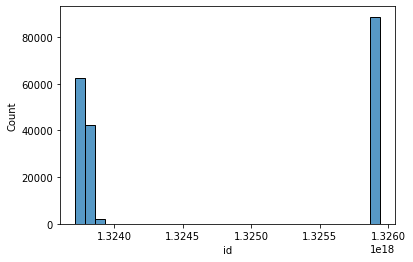

In [11]:
import seaborn as sbn
sbn.histplot(covid_tweets['id'])

Seems likely that I can grab more tweets in the 1324500000000000000-1325000000000000000 range for a third sample? Maybe grab more in a day or two as well.

# Pulling evenly spaced chunks of Tweets from preceding month

Most recent covid tweet: 1326972163195211776
Prominent tweet from 12 Oct: 1315698703550894083

In [6]:
# Creating 101 tweet IDs composing 100 bins
range_start = 1315698703550894083
range_end = 1326972163195211776
range_step = (range_end - range_start)/100
tweet_range = [int(range_start + x*range_step) for x in range(101)]
print(len(tweet_range), tweet_range[0], tweet_range[-1])

101 1315698703550894080 1326972163195211776


In [10]:
tweet_range[0] - range_start

-3

In [11]:
with open('covid_tweets2.csv', 'a') as csv_file:
    csv_writer = csv.writer(csv_file)
    for i in range(100):
        try:
            for tweet in tweepy.Cursor(api.search, q = 'covid -filter:retweets', 
                                       lang = 'en', min_id = tweet_range[i], 
                                       max_id = tweet_range[i+1]-1, tweet_mode = 'extended',
                                       wait_on_rate_limit = True).items(2000):
                try:
                    tweet_text = tweet.extended_tweet['full_text']
                except AttributeError:
                    tweet_text = tweet.full_text
                tweet_symbols = tweet.entities['symbols']
                try:
                    tweet_disp_url = tweet.entities['urls'][0]['url']
                except IndexError:
                    tweet_disp_url = ''
                csv_writer.writerow([tweet_text, tweet.user.screen_name, tweet.id, 
                                     tweet_symbols, tweet_disp_url, tweet.created_at])
        except RuntimeError or StopIteration:
            pass

In [13]:
covid_tweets = pd.read_csv('covid_tweets2.csv', header = None)
covid_tweets

<bound method NDFrame.head of                                                        0                1  \
0      Desperate for a break from the headlines and t...    StirSelfCater   
1      @shortround131 @mmpadellan No your not crazy, ...        rlstalter   
2      @DmodosCutter @vintagecpk @Laboursupportuk I’m...          NatoPMT   
3      Businesses providing essential groceries, medi...        inswindon   
4      Join us tomorrow for a panel discussion on "Pr...   IndiaCoworking   
...                                                  ...              ...   
55995  @Donthate1967 I hate to say this because it mi...         cbeidson   
55996  Dr. Gupta on how bad COVID is in US now: "Doct...         dghowery   
55997  Wear a mask we’ll never get rid of covid becau...      jobrofans93   
55998  @happycan123 @seanhannity It was given to EVER...  WeThePE07474001   
55999  @stlouisbiz It is not about Race - Preventing ...         htwagner   

                         2   3               

Text(0.5, 0, 'ID')

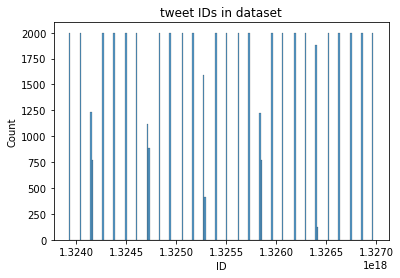

In [16]:
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.histplot(covid_tweets[2], bins = 200)
plt.title('tweet IDs in dataset')
plt.xlabel('ID')